In [ ]:
# %load test.py
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import cvxpy as cp

import config
import core
import os
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation


plt.ion()
plt.close()
fig, ax = plt.subplots(figsize=(7, 7))

net = core.CLF_QP_Net(4, 256, 2)
net.load_state_dict(torch.load('./logs/model.pth'))
net.eval()

nominal_controller = core.LQR()

for i in range(20):
    rho_init = np.random.uniform(10, 12)
    theta_init = np.random.uniform(np.pi/4, np.pi/3)
    v_init = np.random.uniform(-1, 1, size=2)
    s = np.array([[np.cos(theta_init) * rho_init, 
                  np.sin(theta_init) * rho_init,
                  v_init[0], v_init[1]]], dtype=np.float32)

    s = torch.from_numpy(s)

    for j in range(config.NUM_STEPS_PER_EPOCH):

        u_nominal = nominal_controller(np.squeeze(s.detach().numpy()))
        
        use_nominal = False
        s_np = np.squeeze(s.numpy())
        if s_np[1] < 0 and abs(s_np[0]) < abs(s_np[1]):
            u = torch.from_numpy(np.expand_dims(u_nominal, 0).astype(np.float32))
            use_nominal = True

        else:
            V, grad_V = net.compute_lyapunov(s)
            grad_V_np = np.squeeze(grad_V.detach().numpy())
            V_np = np.squeeze(V.detach().numpy())

            s_np = s.numpy()
            u = cp.Variable(2)
            clf_cond = grad_V_np @ (core.A.dot(s_np[0]) + core.B @ u) + 0.005 * V_np
            constraint = [clf_cond <= 0]

            objective = cp.Minimize(cp.sum_squares(u-u_nominal))

            cp.Problem(objective, constraint).solve()
            u = u.value
            u = torch.from_numpy(np.expand_dims(u, 0).astype(np.float32))

        dsdt = core.dynamics_torch(s, u)

        if use_nominal:
            timestep = config.TIME_STEP * 0.7
        else:
            timestep = config.TIME_STEP * 1.0

        s = torch.clip(s + dsdt * timestep, -7, 7)

        plt.clf()
        plt.scatter(s[0, 0].detach().numpy(), s[0, 1].detach().numpy(), s=100)

        ax = fig.gca()
        ax.add_patch(plt.Circle((0, 0), 4, color='g', alpha=0.3, fill=False, linewidth=2, linestyle='--'))
        ax.plot([0, -2.8], [0, -2.8], color='g', alpha=0.3, linewidth=2, linestyle='--')
        ax.plot([0, 2.8], [0, -2.8], color='g', alpha=0.3, linewidth=2, linestyle='--')

        ax.add_patch(patches.Wedge((0, 0), 4, -135, -45, linewidth=2,
                         edgecolor='g', facecolor='g', fill=True, alpha=0.3))

        plt.xlim(-12, 12)
        plt.ylim(-11, 12)

        plt.axis('off')

        fname=fig.canvas.draw()
        plt.pause(0.01)
        

        

In [ ]:
# %run test.py

In [ ]:
https://stackoverflow.com/questions/62644614/requested-moviewriter-ffmpeg-not-available-even-when-i-installed-it
    https://stackoverflow.com/questions/25140952/matplotlib-save-animation-in-gif-error
        https://download.imagemagick.org/ImageMagick/download/python/
            https://wiki.python.org/moin/ImageMagick
                https://stackoverflow.com/questions/60033397/moviewriter-ffmpeg-unavailable-trying-to-use-class-matplotlib-animation-pillo
                https://matplotlib.org/stable/gallery/animation/dynamic_image.html

In [ ]:
# %%writefile filename.py

In [ ]:
# import matplotlib
# matplotlib.use('Agg')
# import matplotlib.pyplot as plt
# import matplotlib.animation
# import numpy as np


# def init_animation():
#     global line
#     line, = ax.plot(x, np.zeros_like(x))
#     ax.set_xlim(0, 2*np.pi)
#     ax.set_ylim(-1,1)

# def animate(i):
#     line.set_ydata(np.sin(2*np.pi*i / 50)*np.sin(x))
#     return line,

# fig = plt.figure()
# ax = fig.add_subplot(111)
# x = np.linspace(0, 2*np.pi, 200)

# ani = matplotlib.animation.FuncAnimation(fig, animate, init_func=init_animation, frames=50)
# ani.save('animation.gif', writer='imagemagick', fps=30)

In [ ]:
import matplotlib
matplotlib.matplotlib_fname()

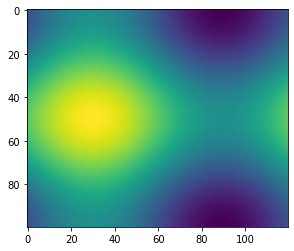

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

plt.scatter
def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = ax.imshow(f(x, y), animated=True)
#     if i == 0:
    ax.imshow(f(x, y))  # show an initial one first
    ims.append([im])
plt.show()



# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)



In [2]:
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

ani.save("movie2.mp4")

In [ ]:
# from matplotlib import pyplot as plt
# from celluloid import Camera
# import numpy as np


# # create figure object
# fig = plt.figure()
# # load axis box
# ax = plt.axes()
# # set axis limit
# ax.set_ylim(0, 1)
# ax.set_xlim(0, 10)

# camera = Camera(fig)
# for i in range(10):
#     ax.scatter(i, np.random.random())
#     plt.pause(0.1)
#     camera.snap()

# animation = camera.animate()
# animation.save('animation.gif', writer='PillowWriter', fps=2)

In [ ]:
# https://imagemagick.org/script/download.php

In [ ]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np


def init_animation():
    global line
    line, = ax.plot(x, np.zeros_like(x))
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1,1)

def animate(i):
    line.set_ydata(np.sin(2*np.pi*i / 50)*np.sin(x))
    return line,

fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(0, 2*np.pi, 200)

ani = matplotlib.animation.FuncAnimation(fig, animate, init_func=init_animation, frames=50)
ani.save('animation.gif', writer='imagemagick', fps=30)

In [ ]:
fig = plt.figure()
import matplotlib.patches as patches
ax = fig.add_subplot(111)
ax.add_patch(plt.Circle((0, 0), 4, color='g', alpha=0.3, fill=False, linewidth=2, linestyle='--'))
ax.plot([0, -2.8], [0, -2.8], color='g', alpha=0.3, linewidth=2, linestyle='--')
ax.plot([0, 2.8], [0, -2.8], color='g', alpha=0.3, linewidth=2, linestyle='--')
ax.add_patch(patches.Wedge((0, 0), 4, -135, -45, linewidth=2,
                         edgecolor='g', facecolor='g', fill=True, alpha=0.3))
# plt.show()

# Code

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import cvxpy as cp
from celluloid import Camera
import config
import core
import os
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation


plt.ion()
plt.close()
# fig, ax = plt.subplots(figsize=(7, 7))

net = core.CLF_QP_Net(4, 256, 2)
net.load_state_dict(torch.load('./logs/model.pth'))
net.eval()

nominal_controller = core.LQR()
# camera = Camera(fig)
ss = []
for i in range(20):
    rho_init = np.random.uniform(10, 12)
    theta_init = np.random.uniform(np.pi/4, np.pi/3)
    v_init = np.random.uniform(-1, 1, size=2)
    s = np.array([[np.cos(theta_init) * rho_init, 
                  np.sin(theta_init) * rho_init,
                  v_init[0], v_init[1]]], dtype=np.float32)

    s = torch.from_numpy(s)

    for j in range(config.NUM_STEPS_PER_EPOCH):

        u_nominal = nominal_controller(np.squeeze(s.detach().numpy()))
        
        use_nominal = False
        s_np = np.squeeze(s.numpy())
        if s_np[1] < 0 and abs(s_np[0]) < abs(s_np[1]):
            u = torch.from_numpy(np.expand_dims(u_nominal, 0).astype(np.float32))
            use_nominal = True

        else:
            V, grad_V = net.compute_lyapunov(s)
            grad_V_np = np.squeeze(grad_V.detach().numpy())
            V_np = np.squeeze(V.detach().numpy())

            s_np = s.numpy()
            u = cp.Variable(2)
            clf_cond = grad_V_np @ (core.A.dot(s_np[0]) + core.B @ u) + 0.005 * V_np
            constraint = [clf_cond <= 0]

            objective = cp.Minimize(cp.sum_squares(u-u_nominal))

            cp.Problem(objective, constraint).solve()
            u = u.value
            u = torch.from_numpy(np.expand_dims(u, 0).astype(np.float32))

        dsdt = core.dynamics_torch(s, u)

        if use_nominal:
            timestep = config.TIME_STEP * 0.7
        else:
            timestep = config.TIME_STEP * 1.0

        s = torch.clip(s + dsdt * timestep, -7, 7)
        ss.append(s)

# #         ims.append(ax)
#         plt.xlim(-12, 12)
#         plt.ylim(-11, 12)

# #         plt.axis('off')

#         fname=fig.canvas.draw()
#         plt.pause(0.01)
#         camera.snap()
     # animation = camera.animate()
# animation.save('animation1.gif', writer='PillowWriter', fps=20)

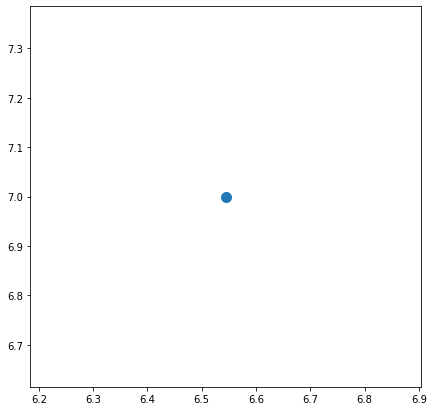

In [7]:
fig, ax = plt.subplots(figsize=(7, 7))
for s in ss:
    ax.scatter(s[0, 0].detach().numpy(), s[0, 1].detach().numpy(), s=100)
#     plt.xlim(-12, 12)
#     plt.ylim(-11, 12)
    plt.pause(0.05)
    plt.show()

In [ ]:
#         plt.clf()
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(s[0, 0].detach().numpy(), s[0, 1].detach().numpy(), s=100)

#         ax = fig.gca()
ax.add_patch(plt.Circle((0, 0), 4, color='g', alpha=0.3, fill=False, linewidth=2, linestyle='--'))
ax.plot([0, -2.8], [0, -2.8], color='g', alpha=0.3, linewidth=2, linestyle='--')
ax.plot([0, 2.8], [0, -2.8], color='g', alpha=0.3, linewidth=2, linestyle='--')

ax.add_patch(patches.Wedge((0, 0), 4, -135, -45, linewidth=2,
                 edgecolor='g', facecolor='g', fill=True, alpha=0.3))
